# DS Apps 2022 @ TAU: HW0
## Getting ready with Python

### Giora Simchoni
### 2022-02-01



### Welcome

Welcome to Homework 0 in Python!

Good news: you don’t have to do anything.

I just want you to run this Jupyter notebook at your leisure in Jupyter, using Binder cloud, Docker or your local installation, and see that everything is working. Though feel free to tweak things and show me interesting stuff if you find any.

### Jupyter notebook

This is an Jupyter notebook. When you execute code within the notebook, the results appear beneath the code.

Try executing this chunk by clicking the Run button at the notebook toolbar above while the chunk is selected, or by placing your cursor inside it and pressing Ctrl+Enter.

In [1]:
print('One and one is', 1 + 1)

One and one is 2


Add a new chunk by clicking the "+" button at the notebook toolbar or by pressing B (for "below") or A (for "above"). Delete a chunk with double D.

If you like to make a chunk a "Markdown" chunk, holding only formatted text, either change its type in the drop-down menu above to "Markdown" or if the cursor is inside the chunk, press Esc, then M.

### Finding Forever Homes

In this notebook we'll try to reproduce some of the findings in [this](https://pudding.cool/2019/10/shelters/) interesting piece on the [Pudding](https://pudding.cool/) website (a must-visit site for data lovers), about the mobility of adoptable dogs in the USA. Where do they come from and where do they go? The data comes from a snaphot of [Petfinder.com](https://www.petfinder.com/) on September 20, 2019.

### Libraries

These are the libraries you will need. If you don't have them, you need to install them first by running e.g. `!pip install pandas` from within the notebook, or opening up a terminal from the main page and running `pip install pandas`.

If you are running this from an environment which has both Python2 and Python3 you may need to run `pip3 install` instead of just `pip install`.

Try running the chunk. If you are running from Docker or from Binder you should have the libraries.

In [2]:
#!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # this is for later

%matplotlib inline

### Load the data

The data can be loaded either from the [Pudding repo](https://github.com/the-pudding/data/tree/master/dog-shelters) or from the [Tidy Tuesday repo](https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-12-17)

In [3]:
dog_moves = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-12-17/dog_moves.csv')
dog_travel = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-12-17/dog_travel.csv')
dog_descriptions = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-12-17/dog_descriptions.csv')

print('dog_moves: %d rows, %d columns' % (dog_moves.shape))
print('dog_travel: %d rows, %d columns' % (dog_travel.shape))
print('dog_descriptions: %d rows, %d columns' % (dog_descriptions.shape))

dog_moves: 90 rows, 5 columns
dog_travel: 6194 rows, 8 columns
dog_descriptions: 58180 rows, 36 columns


In [4]:
dog_travel

,id,contact_city,contact_state,description,found,manual,remove,still_there
0,44520267,Anoka,MN,Boris is a handsome mini schnauzer who made hi...,Arkansas,NaN,NaN,NaN
1,44698509,Groveland,FL,Duke is an almost 2 year old Potcake from Abac...,Abacos,Bahamas,NaN,NaN
2,45983838,Adamstown,MD,Zac Woof-ron is a heartthrob movie star lookin...,Adam,Maryland,NaN,NaN
3,44475904,Saint Cloud,MN,~~Came in to the shelter as a transfer from an...,Adaptil,NaN,True,NaN
4,43877389,Pueblo,CO,Palang is such a sweetheart. She loves her peo...,Afghanistan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
6189,40492179,Fairmont,WV,Please contact Pet (information@pethelpersinc....,WV,NaN,True,NaN
6190,45799729,Eagle Mountain,UT,Shiny is an approximately 4-6-year-old spayed ...,Wyoming,NaN,NaN,NaN
6191,34276515,Newnan,GA,Yanni is a Male Great Pyrenees that we rescue...,Yazmin,NaN,True,NaN
6192,44519341,Dayton,OH,Callie is a 14 year old Chihuahua whose owner ...,Young,Ohio,NaN,NaN


### Finding Scout

The article says there were 4,002 dogs available for adoption in New York. Let's see:

In [5]:
dog_descriptions[dog_descriptions['contact_state'] == 'NY'].shape[0]

4002

Let's find Scout:

In [6]:
cols = ['id', 'name', 'contact_state', 'breed_primary', 'description']
dog_descriptions[(dog_descriptions['contact_state'] == 'NY') & (dog_descriptions['name'] == 'Scout')][cols]

,id,name,contact_state,breed_primary,description
10321,45905526,Scout,NY,Shepherd,"Hi, Scout here to tell you a little about myse..."
11065,45787945,Scout,NY,Labrador Retriever,You can fill out an adoption application onlin...
11318,45723371,Scout,NY,Bull Terrier,Big Life.. little girl.. big heart.. big energ...
13125,44869304,Scout,NY,Rottweiler,"Scout is a female, 3 1/2 yo rottie mix who wei..."
55615,43822962,Scout,NY,Labrador Retriever,"Scout is a very handsome, very sweet 2-year-ol..."


There are a few New York dogs named Scout. The one we're looking for should also be in the `dog_travel` dataset, and it originated in Alabama:

In [7]:
dog_joined = dog_travel.join(dog_descriptions.set_index('id'), on='id', rsuffix=2, how='inner')

dog_joined[(dog_joined['contact_state'] == 'NY') & (dog_joined['name'] == 'Scout') & (dog_joined['found'] == 'Alabama')][cols]

,id,name,contact_state,breed_primary,description
69,45787945,Scout,NY,Labrador Retriever,You can fill out an adoption application onlin...


### Imported and Exported Dogs

Let's see if we can recreate the imported and exported section. We won't try to mimic that nice infographic, but let's at least aim for a function which tells us for each state which dogs were imported from/exported to.

In [8]:
def get_imported_to_exported_from_state(state, data_type):
    if data_type == 'imported':
        filter_var = 'contact_state'
        grouping_var = 'found'
    elif data_type == 'exported':
        filter_var = 'found'
        grouping_var = 'contact_state'
    else:
        raise ValueError('data_type %s not supported' % data_type)
    return dog_joined[(dog_joined[filter_var] == state) & (dog_joined[grouping_var] != state)]\
            .groupby(grouping_var)['id']\
            .count().sort_values(ascending=False).rename('n').to_frame()

ny_imported = get_imported_to_exported_from_state('NY', 'imported')
ny_imported.head(10)

,n
found,
Texas,116
South Carolina,48
Puerto Rico,28
Georgia,27
Tennessee,21
Alabama,19
Thailand,13
Bahamas,11
Far Rockaway,9


The data for New York does not exactly match what we're seeing in the Pudding piece and I'm not quite sure why.

It doesn't seem like a problem in our `join`, but a problem in the raw data. For example, according to the Pudding, there are 4 dogs imported to New York from Egypt, but we only find 2. And this does not stem from a bad `join`, as we can see in the raw data there are only 2 dogs `found` in Egypt with `contact_state` New York:

In [9]:
dog_travel[dog_travel['found'] == 'Egypt'][['id', 'contact_city', 'contact_state', 'found']]

,id,contact_city,contact_state,found
1068,38705887,Phoenix,AZ,Egypt
1069,44148363,Cliffside Park,NJ,Egypt
1070,43624867,North Haledon,NJ,Egypt
1071,43529318,Cliffside Park,NJ,Egypt
1072,42308856,South Ozone Park,NY,Egypt
1073,41357644,Flushing,NY,Egypt
1074,36887156,Cliffside Park,NJ,Egypt
1075,36310469,Cliffside Park,NJ,Egypt
1076,35011554,Cliffside Park,NJ,Egypt
1077,43084058,Lawrenceville,GA,Egypt


Following on "Yasmina", one of the two Egypt-to-NY missing dogs, we do see it in the entire snapshot:

In [10]:
dog_descriptions[dog_descriptions['name'] == 'Yasmina'][cols]

,id,name,contact_state,breed_primary,description
15049,36508955,Yasmina,NY,Shepherd,Name: Yasmina\n\nApproximate Age: 4yrs\n\nBree...


And indeed if you read carefully its description, you see it was indeed born in Egypt:

In [11]:
print(dog_descriptions[dog_descriptions['name'] == 'Yasmina']['description'].values[0])

Name: Yasmina

Approximate Age: 4yrs

Breed: Baladi

Sex: Female

Special Needs: Requires frequent trips outside due to effects of previous injury

Adoption fee: $325

Up to date on vaccinations/preventatives. Spayed. Microchipped.

No one knows much of my past but I was born in Egypt and became a US citizen in 2014. When I first came to the states, we were all under the impression I was paralyzed- not knowing why or how, but I couldnt use my back end. Either way I was a happy girl, just thankful to be loved and cared for. My foster mom got me a wheelchair but she was convinced I could someday walk. With her dedication and both of our hard work guess who doesnt need a set of wheels anymore? Me! Yeah, I may have a few scars, walk with a wobble (which I may add everyone finds adorable) and have to go outside more than most but all in all, Im a walking machine! The only thing that I havent been able to master yet is a full set of stairs- I can handle up to 5 but I get nervous about doing 

However Yasmina does not appear in the raw subset of dogs which moved from one state to another:

In [12]:
dog_travel[dog_travel['id'] == 3650895]

,id,contact_city,contact_state,description,found,manual,remove,still_there


### Import to Export by State

I'm not sure there is library in Python which would help us reproduce that nice US map showing for each state how many dogs were imported and how many exported (there are a few `ggplot2` extensions which come close in R). So let's do a dumbbell plot with [Seaborn](https://seaborn.pydata.org/).

The following is heavily based on this [Python Gallery](https://python-graph-gallery.com/184-lollipop-plot-with-2-groups/) example. There's a similar gallery for R and they're life savers.

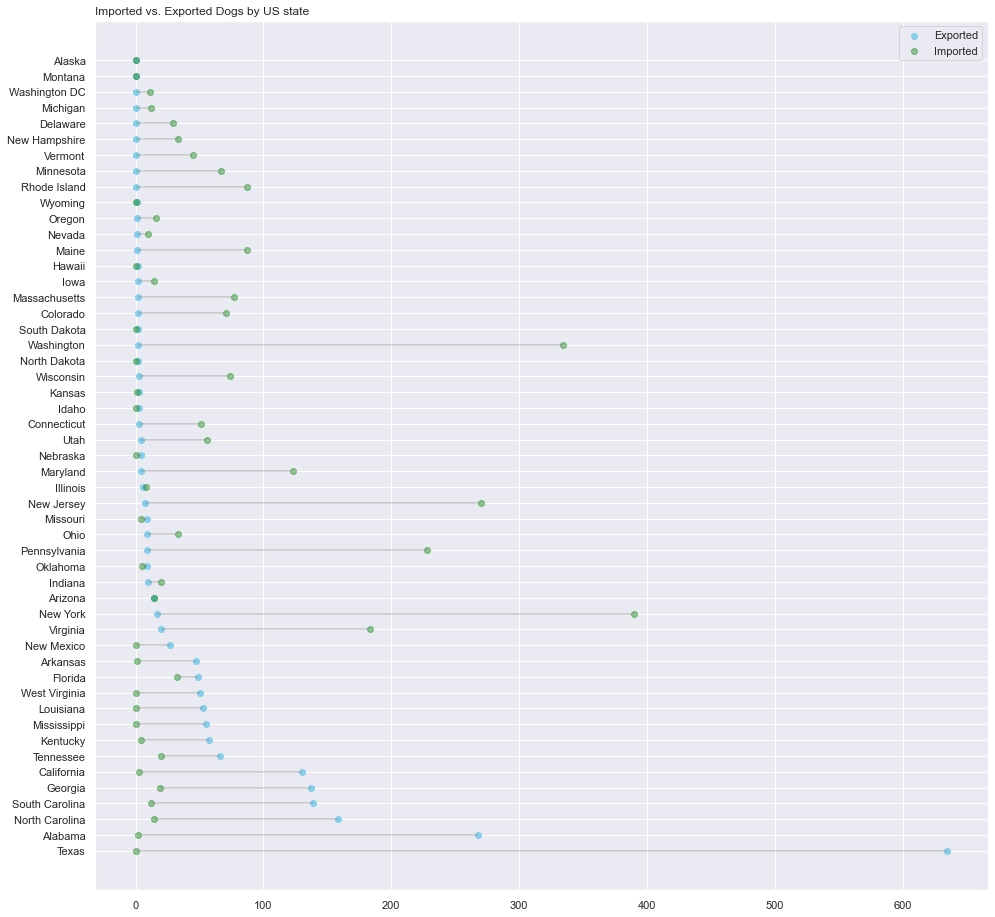

In [13]:
dog_moves_in_us = dog_moves[dog_moves['inUS']].sort_values(by='exported', ascending=False).fillna(0)
dog_moves_in_us.index = range(len(dog_moves_in_us))
my_range=range(1, len(dog_moves_in_us.index) + 1)
 
# The vertical plot is made using the hline function
# Load the seaborn library only to benefit the nice looking feature
sns.set()
plt.figure(figsize=(16, 16))
plt.hlines(y=my_range, xmin=dog_moves_in_us['exported'], xmax=dog_moves_in_us['imported'], color='grey', alpha=0.4)
plt.scatter(dog_moves_in_us['exported'], my_range, color='skyblue', alpha=1, label='Exported')
plt.scatter(dog_moves_in_us['imported'], my_range, color='green', alpha=0.4 , label='Imported')
plt.legend()
 
plt.yticks(my_range, dog_moves_in_us['location'])
plt.title('Imported vs. Exported Dogs by US state', loc='left')
plt.show()

This is an alternative way to show the difference between southern and northern states, though not a very good one.

According to the Pudding:
> In many northern states, rescue dogs are in demand, but sometimes in short supply. Families in these areas have reported wanting to adopt a dog, but the ones that were local and met their needs in both size or temperament were unavailable too quickly. People in southern states, often have the opposite problem. Due in part to less rigorous spay and neuter programs, poverty, a warmer climate, and in some cases, a different perspective on the role pets play in their families, stray dogs are very common in some areas of the south.


This left me convinced I *should* try to at least color the US map by Export to Import ratio but I leave it to the reader...

We *could*, however, make the above plot a little nicer by simply plotting the Export to Import ratio in a simple bar plot or lollipop plot, but this would create problems e.g. for Texas where the Import value is 0, and the ratio is infinity...

### Wrap up

And that's it, you have shown you can run a Python Jupyter notebook, seen some Pandasverse magic and hopefully learned something about the adoptable dogs mobility in the US. Good luck with the rest of the course!